# Wordcloud Visualization for Bible Corpus

Data taken from kaggle: https://www.kaggle.com/oswinrh/bible/kernels

In [4]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
bible = pd.read_csv(r"D:\Python datasets\t_kjv.csv")
bible.head()

,id,b,c,v,t
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


## Entire Bible

In [49]:
bible_all = pd.read_csv(r"D:\Python datasets\t_kjv.csv")
bible_all.head()

,id,b,c,v,t
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


In [65]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


testing = bible_all.t[:-1]
bible_result_all = []
for t in testing:
    bible_result_all.append(tweet_cleaner(t))

In [66]:
clean_all = pd.DataFrame(bible_result_all,columns=['t'])
clean_all.shape

(31102, 1)

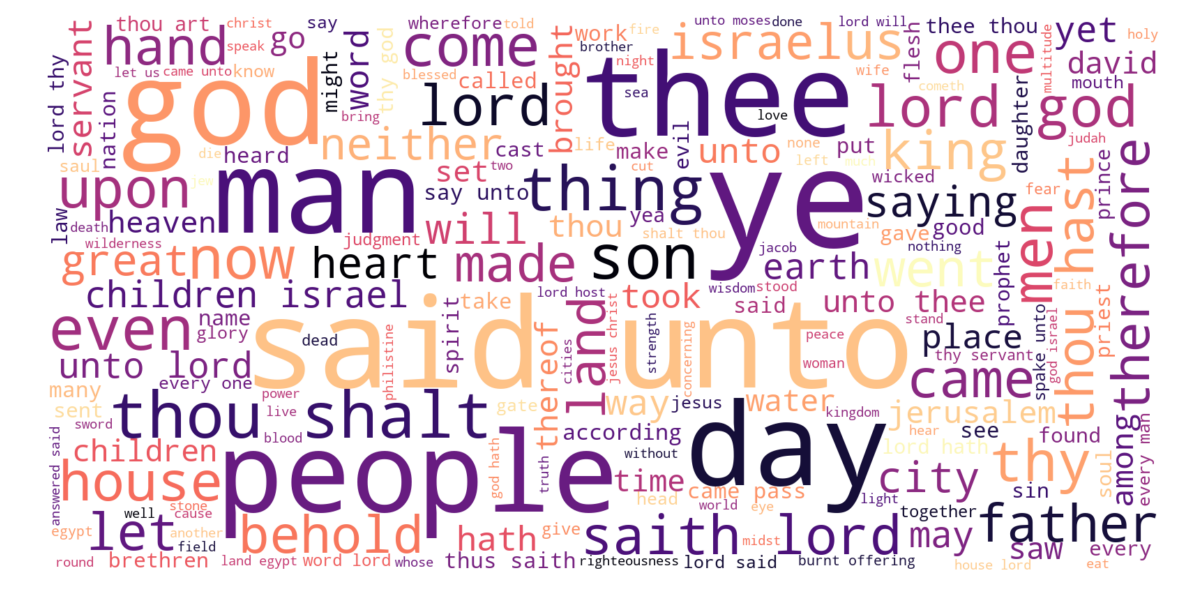

In [67]:
from PIL import Image 
neg_review = clean_all
neg_string = []
for t in neg_review.t:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",stopwords = stopwords, colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# fig.savefig("wordcloudall.jpg")
plt.show()

In [75]:
import nltk
from nltk.corpus import stopwords
top_N = 50
#if not necessary all lower
a = neg_string
words = nltk.tokenize.word_tokenize(a)
stopWords = set(stopwords.words('english'))
wordsFiltered =[]
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
word_dist = nltk.FreqDist(wordsFiltered)

In [77]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.to_csv('oldt.csv',encoding='utf-8')
csv = 'oldt.csv'
print(rslt)

         Word  Frequency
0       shall       9838
1        unto       8997
2        lord       7963
3        thou       5474
4         thy       4600
5         god       4472
6        said       3999
7          ye       3982
8        thee       3827
9        upon       2748
10        man       2735
11     israel       2575
12       king       2540
13        son       2392
14       hath       2264
15     people       2143
16       came       2093
17      house       2024
18       come       1971
19        one       1969
20   children       1822
21       also       1769
22        day       1743
23       land       1718
24        men       1678
25      shalt       1616
26        let       1511
27         go       1492
28       hand       1466
29         us       1451
30     saying       1445
31       made       1405
32       went       1400
33       even       1393
34     behold       1326
35      saith       1262
36  therefore       1237
37      every       1236
38     things       1162


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

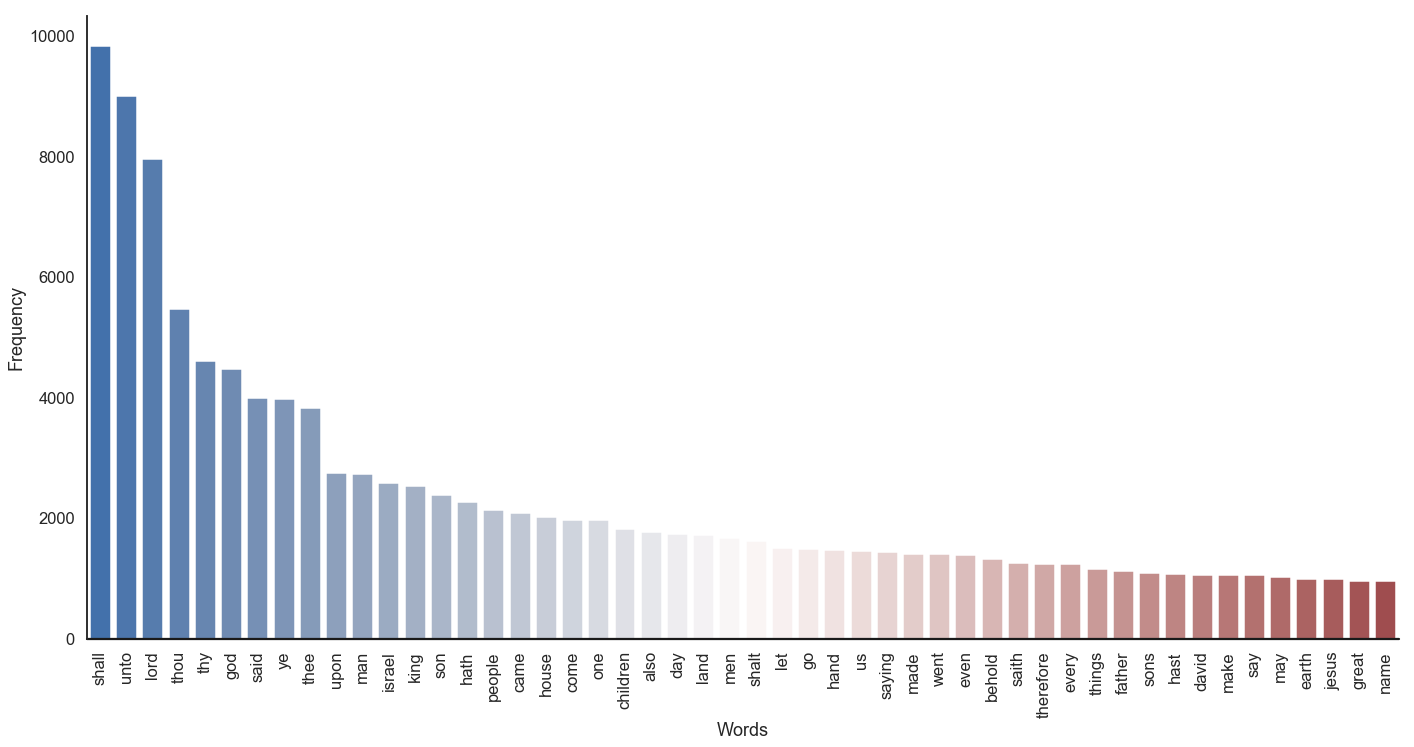

In [78]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.set(style = "white", context = "talk", font_scale = 1)
ax1 = sns.barplot(x="Word", y="Frequency", palette="vlag", data = rslt, ci = None)
ax1.axhline(0, color = "k", clip_on= False)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Words")
sns.despine(bottom = True)
plt.tight_layout(h_pad=2)
plt.xticks(rotation=90)

## Countplot for Books in the bible. 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

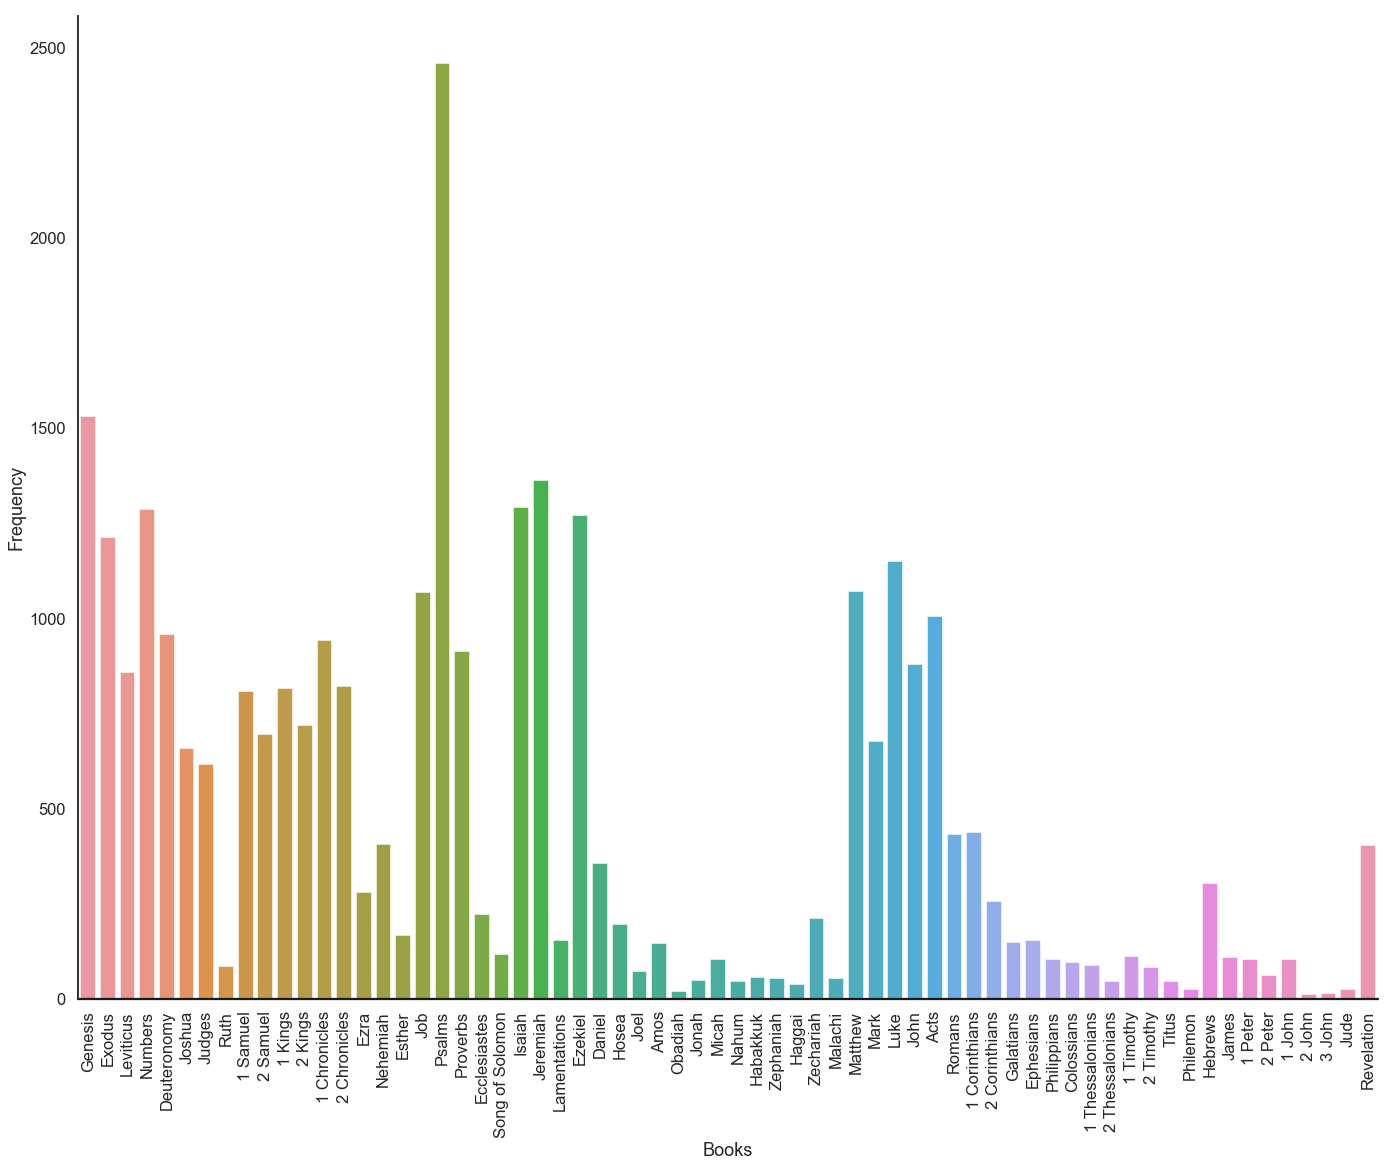

In [53]:
fig = plt.figure(figsize=(20,15))
sns.set(style = "white", context = "talk", font_scale = 1)
ax1 = sns.countplot(bible_all['b'])
ax1.axhline(0, color = "k", clip_on= False)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Books")
sns.despine(bottom = True)
plt.tight_layout(h_pad=2)
plt.xticks(rotation=90)

## The New Testament Onwards

In [4]:
bible = bible[bible['b'] = 40]
bible.head()

,id,b,c,v,t
23145,40001001,40,1,1,"The book of the generation of Jesus Christ, th..."
23146,40001002,40,1,2,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,40001003,40,1,3,And Judas begat Phares and Zara of Thamar; and...
23148,40001004,40,1,4,And Aram begat Aminadab; and Aminadab begat Na...
23149,40001005,40,1,5,And Salmon begat Booz of Rachab; and Booz bega...


In [7]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


testing = bible.t[:-1]
bible_result = []
for t in testing:
    bible_result.append(tweet_cleaner(t))

In [9]:
clean_df = pd.DataFrame(bible_result,columns=['t'])
clean_df.shape

(7957, 1)

In [10]:
clean_df.to_csv('clean_text.csv',encoding='utf-8')
csv = 'clean_text.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,t
0,the book of the generation of jesus christ the...
1,abraham begat isaac and isaac begat jacob and ...
2,and judas begat phares and zara of thamar and ...
3,and aram begat aminadab and aminadab begat naa...
4,and salmon begat booz of rachab and booz begat...


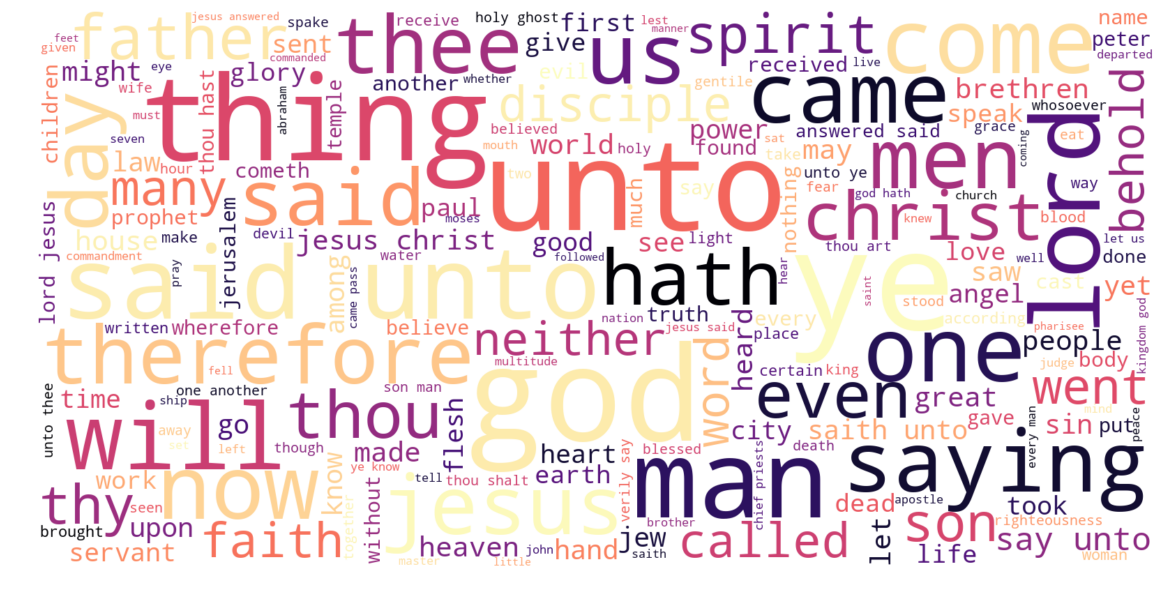

In [30]:
from PIL import Image 
neg_review = my_df
neg_string = []
for t in neg_review.t:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# wave_mask = np.array(Image.open( "D:\Python Projects\Kaodim_red.png"))

wordcloud = WordCloud(background_color="white",stopwords = stopwords,colormap="magma", width=1600, height=800,max_font_size=200).generate(neg_string)
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("wordcloud.jpg")
plt.show()

In [1]:
import nltk
from nltk.corpus import stopwords
top_N = 50
#if not necessary all lower
a = my_df['t'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
stopWords = set(stopwords.words('english'))
wordsFiltered =[]
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
word_dist = nltk.FreqDist(wordsFiltered)

NameError: name 'my_df' is not defined

In [15]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.to_csv('comment.csv',encoding='utf-8')
csv = 'comment.csv'
print(rslt)

         Word  Frequency
0        unto       2446
1          ye       1559
2       shall       1415
3         god       1372
4        said       1061
5       jesus        982
6         man        908
7        thou        857
8      things        729
9        lord        727
10        one        608
11       also        599
12       come        587
13     christ        570
14       hath        557
15       came        506
16         us        489
17       thee        483
18     saying        455
19        say        428
20        son        422
21        thy        416
22        men        396
23     father        370
24  therefore        356
25        let        342
26       went        338
27        day        319
28      saith        307
29       know        299
30       many        286
31       made        286
32        may        284
33      every        280
34       even        275
35       upon        263
36     spirit        261
37     heaven        256
38      great        254


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

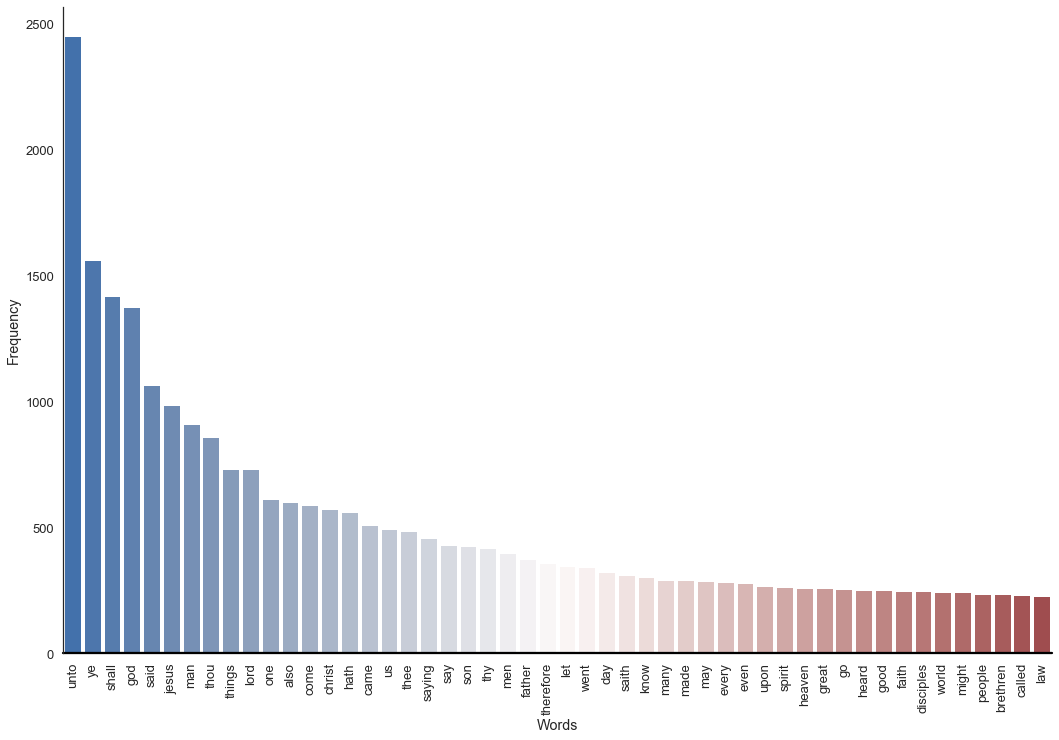

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.set(style = "white", context = "talk", font_scale = 1)
ax1 = sns.barplot(x="Word", y="Frequency", palette="vlag", data = rslt, ci = None)
ax1.axhline(0, color = "k", clip_on= False)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Words")
sns.despine(bottom = True)
plt.tight_layout(h_pad=2)
plt.xticks(rotation=90)

In [20]:
matthew = pd.read_csv(r"D:\Python datasets\t_asv.csv")
matthew.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heavens and t...
1,1001002,1,1,2,And the earth was waste and void; and darkness...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [21]:
matthew = matthew[matthew['b'] == 40]
matthew = matthew[['c','t']]
matthew.head()

,c,t
23145,1,"The book of the generation of Jesus Christ, th..."
23146,1,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,1,and Judah begat Perez and Zerah of Tamar; and ...
23148,1,and Ram begat Amminadab; and Amminadab begat N...
23149,1,and Salmon begat Boaz of Rahab; and Boaz begat...


In [22]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


testing = matthew.t[:-1]
matthew_result = []
for t in testing:
    matthew_result.append(tweet_cleaner(t))

In [23]:
clean_matthew = pd.DataFrame(matthew_result,columns=['t'])
clean_matthew['c'] = matthew.c
clean_matthew.shape

(1070, 2)

In [38]:
csv = 'clean_matthew1.csv'
my_df = pd.read_csv(csv,index_col=0)

In [39]:
my_df.head()

,t,c
0,the book of the generation of jesus christ the...,1
1,abraham begat isaac and isaac begat jacob and ...,1
2,and judah begat perez and zerah of tamar and p...,1
3,and ram begat amminadab and amminadab begat na...,1
4,and salmon begat boaz of rahab and boaz begat ...,1


## Sentiment Analysis using textblob on the Bible verses

Attempting to plot the progression of polarity across chapters within the Book of Matthew. 

In [40]:
df = my_df
df['polarity'] = df.apply(lambda x: TextBlob(x['t']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['t']).sentiment.subjectivity, axis=1)
print(df)

                                                      t   c  polarity  \
0     the book of the generation of jesus christ the...   1  0.000000   
1     abraham begat isaac and isaac begat jacob and ...   1  0.000000   
2     and judah begat perez and zerah of tamar and p...   1  0.000000   
3     and ram begat amminadab and amminadab begat na...   1  0.000000   
4     and salmon begat boaz of rahab and boaz begat ...   1  0.000000   
5     and jesse begat david the king and david begat...   1  0.000000   
6     and solomon begat rehoboam and rehoboam begat ...   1  0.000000   
7     and asa begat jehoshaphat and jehoshaphat bega...   1  0.000000   
8     and uzziah begat jotham and jotham begat ahaz ...   1  0.000000   
9     and hezekiah begat manasseh and manasseh begat...   1  0.000000   
10    and josiah begat jechoniah and his brethren at...   1  0.000000   
11    and after the carrying away to babylon jechoni...   1  0.000000   
12    and zerubbabel begat abiud and abiud begat el

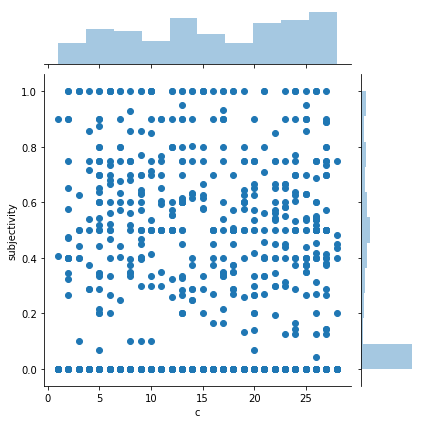

In [41]:
import seaborn as sns
sns.jointplot(x='c', y = 'subjectivity', data = my_df)

## Polarity Progression across chapters

A polarity score with negative values means that a particular verses has a bad polarity or in other words, bring negative sentiment.

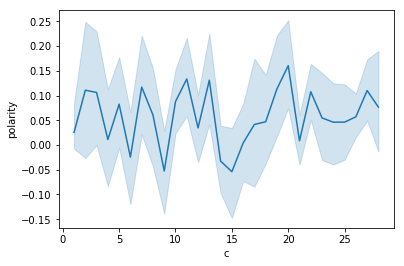

In [43]:
sns.lineplot(x=my_df["c"], y=my_df["polarity"])


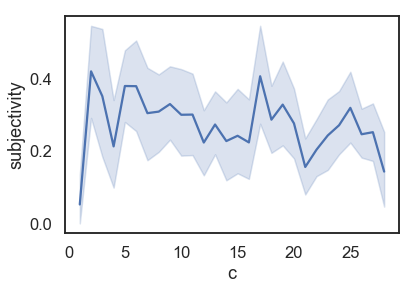

In [60]:
sns.lineplot(x=my_df["c"], y=my_df["subjectivity"])


In [36]:
my_df[my_df['c'] == 15]

,t,c,polarity,subjectivity
0,the book of the generation of jesus christ the...,15,0.000000,0.000000
1,abraham begat isaac and isaac begat jacob and ...,15,0.000000,0.000000
2,and judah begat perez and zerah of tamar and p...,15,0.000000,0.000000
3,and ram begat amminadab and amminadab begat na...,15,0.000000,0.000000
4,and salmon begat boaz of rahab and boaz begat ...,15,0.000000,0.000000
5,and jesse begat david the king and david begat...,15,0.000000,0.000000
6,and solomon begat rehoboam and rehoboam begat ...,15,0.000000,0.000000
7,and asa begat jehoshaphat and jehoshaphat bega...,15,0.000000,0.000000
8,and uzziah begat jotham and jotham begat ahaz ...,15,0.000000,0.000000
9,and hezekiah begat manasseh and manasseh begat...,15,0.000000,0.000000
